In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

In [7]:
main_data = pd.read_csv("/content/housing_price_dataset.csv")

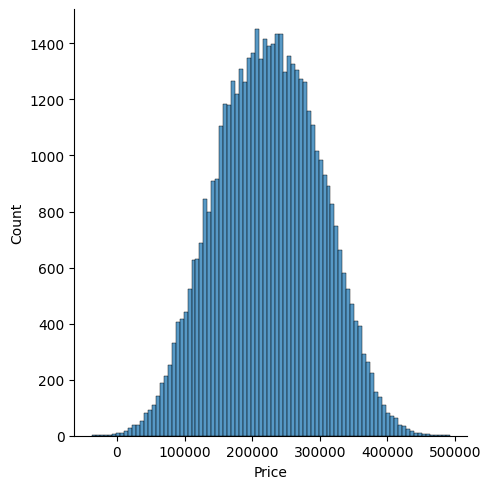

In [8]:
# prompt: i want to create two distribution plot based on the price column

sns.displot(main_data["Price"])

In [9]:
main_data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [10]:
# prompt: create a new column called min_sqft_check in the main_data table based on this condition,  if([SquareFeet]/[Bedrooms])>=300 then 1 else 0)

main_data['min_sqft_check'] = main_data.apply(lambda x: 1 if (x['SquareFeet']/x['Bedrooms'])>=300 else 0, axis=1)

In [11]:
# prompt: put filter on the min_sqft_check = 0 and then count rows

filtered_data = main_data[main_data['min_sqft_check'] == 0]
row_count = len(filtered_data)
print(f"Number of rows where min_sqft_check is 0: {row_count}")

Number of rows where min_sqft_check is 0: 4230


In [12]:
# prompt: create a new data frame called Df_1Sqft where put filter on the min_sqft_check = 1 and then do count

Df_1Sqft = main_data[main_data['min_sqft_check'] == 1]
count_Df_1Sqft = len(Df_1Sqft)
print(f"Number of rows where min_sqft_check is 1: {count_Df_1Sqft}")

Number of rows where min_sqft_check is 1: 45770


In [13]:
Df_1Sqft = main_data[main_data['min_sqft_check'] == 1]

In [14]:
# prompt: in Df_1Sqft data frame do group by based on the Neighborhood and calculate standard deviation.

Df_1Sqft.groupby('Neighborhood')['Price'].std()

,Price
Neighborhood,
Rural,74340.503389
Suburb,74485.042888
Urban,74088.342762


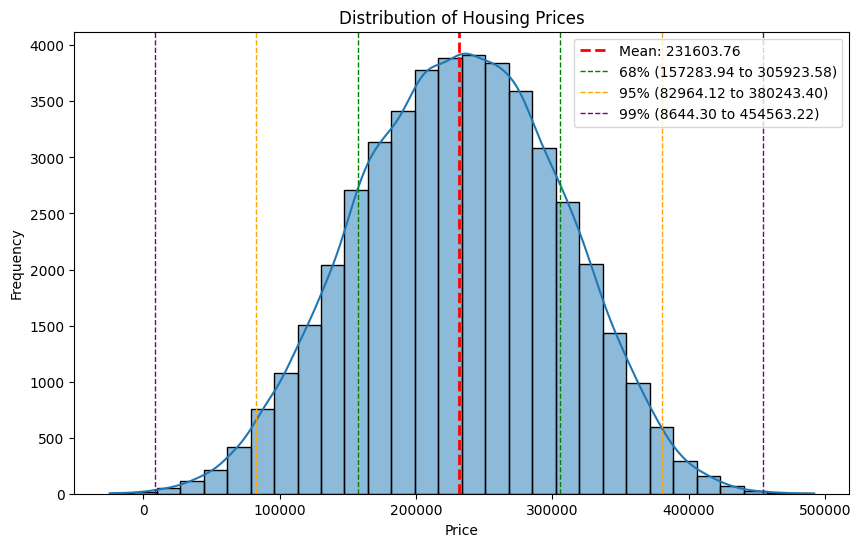

In [16]:
# prompt: can we create a distribution plot chart where below it shows the standard deviation and identify 68,95,99 % so that we can treat the outlier

import matplotlib.pyplot as plt
# calculate mean, standard deviation, and quantiles
mean = Df_1Sqft["Price"].mean()
std = Df_1Sqft["Price"].std()
q68_lower = mean - std
q68_upper = mean + std
q95_lower = mean - 2 * std
q95_upper = mean + 2 * std
q99_lower = mean - 3 * std
q99_upper = mean + 3 * std

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(Df_1Sqft["Price"], kde=True, bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add vertical lines for standard deviations
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(q68_lower, color='green', linestyle='dashed', linewidth=1, label=f'68% ({q68_lower:.2f} to {q68_upper:.2f})')
plt.axvline(q68_upper, color='green', linestyle='dashed', linewidth=1)
plt.axvline(q95_lower, color='orange', linestyle='dashed', linewidth=1, label=f'95% ({q95_lower:.2f} to {q95_upper:.2f})')
plt.axvline(q95_upper, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(q99_lower, color='purple', linestyle='dashed', linewidth=1, label=f'99% ({q99_lower:.2f} to {q99_upper:.2f})')
plt.axvline(q99_upper, color='purple', linestyle='dashed', linewidth=1)

plt.legend()
plt.show()

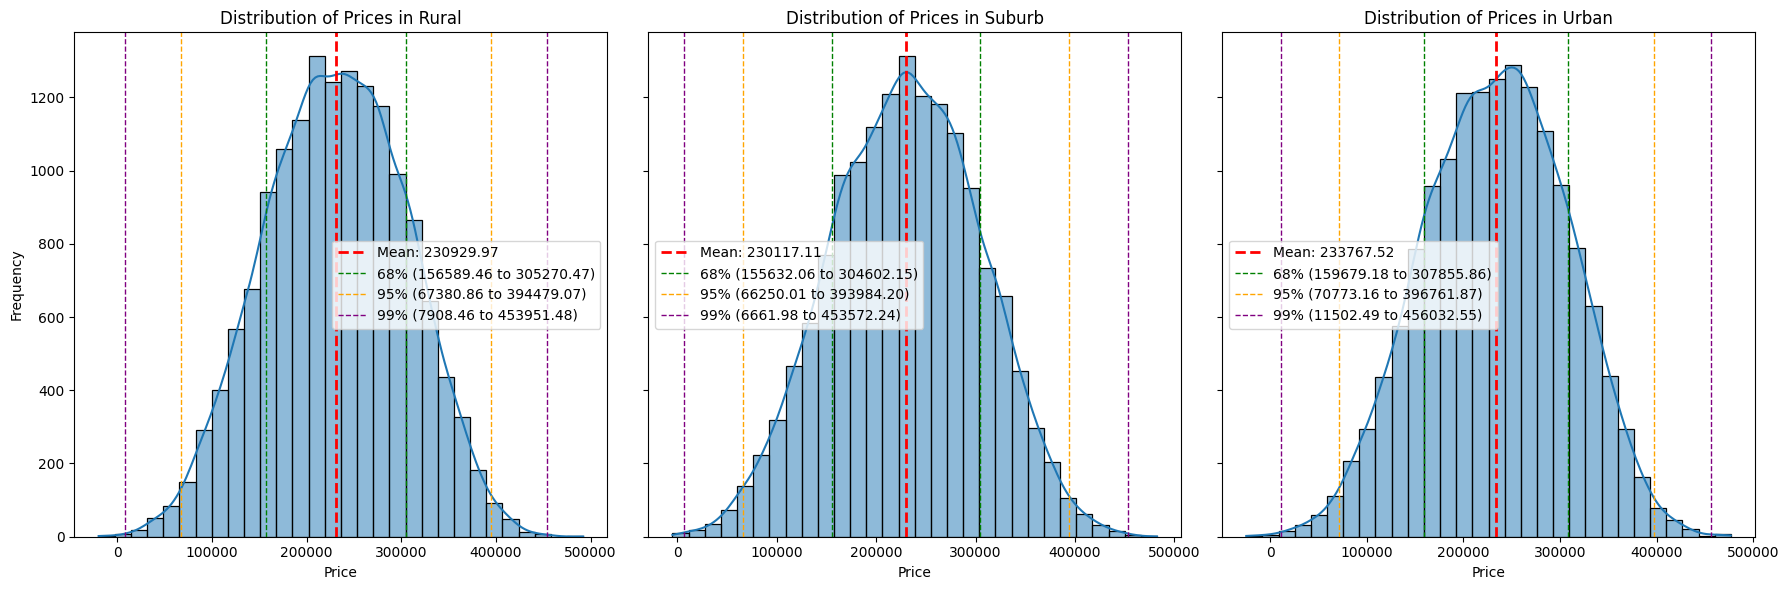

In [17]:
# prompt: group by data based on the Neighborhood and YearBuilt create 3 different distribution plot chart based on the Neighborhood values and also show the 68,95 and 99.7 % values distribution in order to identify the outliers, can we see data side by side

import matplotlib.pyplot as plt
# Group data by Neighborhood and YearBuilt
grouped_data = Df_1Sqft.groupby(['Neighborhood', 'YearBuilt'])['Price'].agg(['mean', 'median', 'std']).reset_index()

# Get the unique neighborhoods
neighborhoods = Df_1Sqft['Neighborhood'].unique()

# Create subplots for each neighborhood's distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, neighborhood in enumerate(neighborhoods[:3]): # Take the first 3 unique neighborhoods
    subset_data = Df_1Sqft[Df_1Sqft['Neighborhood'] == neighborhood]['Price']

    # Calculate mean, standard deviation, and quantiles for the subset
    mean_subset = subset_data.mean()
    std_subset = subset_data.std()
    q68_lower_subset = mean_subset - std_subset
    q68_upper_subset = mean_subset + std_subset
    q95_lower_subset = mean_subset - 2.2 * std_subset
    q95_upper_subset = mean_subset + 2.2 * std_subset
    q99_lower_subset = mean_subset - 3 * std_subset
    q99_upper_subset = mean_subset + 3 * std_subset

    # Create the distribution plot for the subset
    sns.histplot(subset_data, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of Prices in {neighborhood}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

    # Add vertical lines for standard deviations
    axes[i].axvline(mean_subset, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_subset:.2f}')
    axes[i].axvline(q68_lower_subset, color='green', linestyle='dashed', linewidth=1, label=f'68% ({q68_lower_subset:.2f} to {q68_upper_subset:.2f})')
    axes[i].axvline(q68_upper_subset, color='green', linestyle='dashed', linewidth=1)
    axes[i].axvline(q95_lower_subset, color='orange', linestyle='dashed', linewidth=1, label=f'95% ({q95_lower_subset:.2f} to {q95_upper_subset:.2f})')
    axes[i].axvline(q95_upper_subset, color='orange', linestyle='dashed', linewidth=1)
    axes[i].axvline(q99_lower_subset, color='purple', linestyle='dashed', linewidth=1, label=f'99% ({q99_lower_subset:.2f} to {q99_upper_subset:.2f})')
    axes[i].axvline(q99_upper_subset, color='purple', linestyle='dashed', linewidth=1)

    axes[i].legend()

plt.tight_layout()
plt.show()

In [18]:
main_data.Price.mean()

np.float64(224827.32515099045)

In [19]:
# prompt: create a new column in the Df_1Sqft called price_zscore and calculate the Z_score after group by with Neighborhood

Df_1Sqft['price_zscore'] = Df_1Sqft.groupby('Neighborhood')['Price'].transform(lambda x: (x - x.mean()) / x.std())

print(Df_1Sqft.head())


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price  \
0        2126         4          1        Rural       1969  215355.283618   
1        2459         3          2        Rural       1980  195014.221626   
2        1860         2          1       Suburb       1970  306891.012076   
3        2294         2          1        Urban       1996  206786.787153   
4        2130         5          2       Suburb       2001  272436.239065   

   min_sqft_check  price_zscore  
0               1     -0.209505  
1               1     -0.483125  
2               1      1.030729  
3               1     -0.364170  
4               1      0.568156  


/tmp/ipython-input-19-1473334438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_1Sqft['price_zscore'] = Df_1Sqft.groupby('Neighborhood')['Price'].transform(lambda x: (x - x.mean()) / x.std())


In [20]:
# prompt: group by Neighborhood and calculate standard deviation of price and mean of price and calculate 2 standard deviation by mean-(2*standard deviation)

neighborhood_stats = Df_1Sqft.groupby('Neighborhood')['Price'].agg(['mean', 'std']).reset_index()
neighborhood_stats['price_2std'] = neighborhood_stats['mean'] - 2.2 * neighborhood_stats['std']
neighborhood_stats


,Neighborhood,mean,std,price_2std
0,Rural,230929.965331,74340.503389,67380.857875
1,Suburb,230117.107416,74485.042888,66250.013063
2,Urban,233767.517796,74088.342762,70773.163719


In [21]:
# prompt: create a new column called R_price where put condition that is if price_zscore<-2 then return price_2std else price value

import pandas as pd
import numpy as np
Df_1Sqft = pd.merge(Df_1Sqft, neighborhood_stats[['Neighborhood', 'price_2std']], on='Neighborhood', how='left')

Df_1Sqft['R_price'] = np.where(Df_1Sqft['Price'] <= Df_1Sqft['price_2std'] , Df_1Sqft['price_2std'], Df_1Sqft['Price'])

print(Df_1Sqft[['Price', 'price_zscore', 'price_2std', 'R_price']].head())

           Price  price_zscore    price_2std        R_price
0  215355.283618     -0.209505  67380.857875  215355.283618
1  195014.221626     -0.483125  67380.857875  195014.221626
2  306891.012076      1.030729  66250.013063  306891.012076
3  206786.787153     -0.364170  70773.163719  206786.787153
4  272436.239065      0.568156  66250.013063  272436.239065


In [22]:
# prompt: Df_1Sqft put filter that is YearBuilt  = 1950 and Neighborhood  = Rural  and price_zscore  < -2 it is just for the check

Df_filtered = Df_1Sqft[(Df_1Sqft['YearBuilt'] == 1950) & (Df_1Sqft['Neighborhood'] == 'Rural') & (Df_1Sqft['price_zscore'] < -2)]
Df_filtered

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,min_sqft_check,price_zscore,price_2std,R_price
12781,1358,2,2,Rural,1950,81660.898819,1,-2.007910,67380.857875,81660.898819
13435,1131,2,3,Rural,1950,57097.455331,1,-2.338328,67380.857875,67380.857875
14283,1298,2,3,Rural,1950,63344.805940,1,-2.254291,67380.857875,67380.857875
15003,1307,2,2,Rural,1950,77399.799611,1,-2.065229,67380.857875,77399.799611
37149,1017,2,1,Rural,1950,31952.189583,1,-2.676573,67380.857875,67380.857875


In [23]:
# prompt: calculate 25,50 and 75 percentile values based on the R_price of Df_1Sqft

percentiles = Df_1Sqft['R_price'].quantile([0.25, 0.5, 0.75])
print("25th percentile of R_price:", percentiles[0.25])
print("50th percentile (Median) of R_price:", percentiles[0.5])
print("75th percentile of R_price:", percentiles[0.75])

25th percentile of R_price: 178809.2936477208
50th percentile (Median) of R_price: 232695.43212454458
75th percentile of R_price: 284639.8077772776


In [24]:
# prompt: create a new column called listing_category based on this condition -
# if [r_price] < Q1 then "Budget"
#         else if [r_price] <= Q3 then "Mid-Range"
#         else "High-End",
# here Q1 and Q3 are part of the percentile of R_price

Q1 = Df_1Sqft['R_price'].quantile(0.25)
Q3 = Df_1Sqft['R_price'].quantile(0.75)

Df_1Sqft['listing_category'] = Df_1Sqft['R_price'].apply(lambda x: "Budget" if x < Q1 else ("Mid-Range" if x <= Q3 else "High-End"))



In [25]:
Df_1Sqft.head(20)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,min_sqft_check,price_zscore,price_2std,R_price,listing_category
0,2126,4,1,Rural,1969,215355.283618,1,-0.209505,67380.857875,215355.283618,Mid-Range
1,2459,3,2,Rural,1980,195014.221626,1,-0.483125,67380.857875,195014.221626,Mid-Range
2,1860,2,1,Suburb,1970,306891.012076,1,1.030729,66250.013063,306891.012076,High-End
3,2294,2,1,Urban,1996,206786.787153,1,-0.364170,70773.163719,206786.787153,Mid-Range
4,2130,5,2,Suburb,2001,272436.239065,1,0.568156,66250.013063,272436.239065,Mid-Range
5,2095,2,3,Suburb,2020,198208.803907,1,-0.428385,66250.013063,198208.803907,Mid-Range
6,2724,2,1,Suburb,1993,343429.319110,1,1.521275,66250.013063,343429.319110,High-End
7,2044,4,3,Rural,1957,184992.321268,1,-0.617936,67380.857875,184992.321268,Mid-Range
8,2638,4,3,Urban,1959,377998.588152,1,1.946744,70773.163719,377998.588152,High-End
9,2238,3,3,Suburb,1987,253358.645002,1,0.312030,66250.013063,253358.645002,Mid-Range


In [26]:
# prompt: i want to create a csv file of Df_1Sqft and download as well

Df_1Sqft.to_csv('Df_1Sqft.csv', index=False)
from google.colab import files
files.download('Df_1Sqft.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# prompt: put filter on year = 1951 and neighborhood = suburb and sqft = 1002 do this on the Df_1Sqft

Df_filtered = Df_1Sqft[(Df_1Sqft['YearBuilt'] == 1951) & (Df_1Sqft['Neighborhood'] == 'Suburb') & (Df_1Sqft['SquareFeet'] == 1002)]
Df_filtered

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,min_sqft_check,price_zscore,price_2std,R_price,listing_category
15879,1002,2,1,Suburb,1951,78632.888226,1,-2.033754,66250.013063,78632.888226,Budget


In [30]:
X = Df_1Sqft[['YearBuilt']]
y = Df_1Sqft['Avg_price']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict future years
future_years = np.array([[2025], [2026], [2027], [2028], [2029]])
future_prices = model.predict(future_years)

# Print predictions
for year, price in zip(future_years, future_prices):
    print(f"Year: {year[0]}, Predicted Avg Price: {round(price)}")

NameError: name 'widgets' is not defined